In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt 
import re
from matplotlib.offsetbox import AnchoredText
sns.set_style("white")
sns.set_context("talk")
%matplotlib inline 

In [2]:
df = pd.read_csv("plate1/high_expression/plate1_high_expression_fluorescence_vs_temperature.csv")

In [3]:
df_tm = pd.read_csv('plate1/high_expression/plate1_high_expression_manual_Tm_detection.csv', header=1)

In [4]:
temps = list(df['X'])

In [5]:
col_to_keep = [x for x in df.columns if not re.match('X', x)]
df_data = df[col_to_keep]

In [6]:
df4= pd.read_csv("plate4/high_expression/plate4_high_expression_fluorescence_vs_temperature.csv")
col_to_keep = [x for x in df4.columns if not re.match('X', x)]
df_data4 = df4[col_to_keep]
df_tm4 = pd.read_csv('plate4/high_expression/plate4_high_expression_manual_Tm_detection.csv', header=1)
temps4 = list(df4['X'])

In [7]:
df_exp = pd.read_excel('../expression_data/96-kinase/470_Report_Expression_Test_Results.xls')
list_of_wells = [x.split(':')[0] for x in col_to_keep]
df_exp = df_exp[df_exp.Well.isin(list_of_wells)]
kinase_names = list(df_exp[ 'target ID'])
kinase_names = [x.split('_')[0] for x in kinase_names]
wells = list(df_exp[ 'Well'])
kinase_dict = dict(zip(wells, kinase_names))

In [8]:
kinase_dict

{'C12': 'VRK3',
 'C5': 'KC1G1',
 'C6': 'DYR1A',
 'D1': 'PMYT1',
 'D10': 'MK11',
 'D3': 'GAK',
 'D9': 'KC1G3',
 'E5': 'CSK',
 'G5': 'STK3',
 'H11': 'FES',
 'H5': 'MK14',
 'H6': 'VRK1',
 'H7': 'MK13',
 'H8': 'MK03'}

In [9]:
df_low4= pd.read_csv("plate4/no_expression/plate4_no_expression_fluorescence_vs_temperature.csv")
col_to_keeplow4 = [x for x in df_low4.columns if not re.match('X', x)]
df_data_low4 = df_low4[col_to_keeplow4]
#df_lowtm = pd.read_csv('plate4/low_expression/plate4_low_expression_manual_Tm_detection.txt', header=1)
temps_low4 = list(df_low4['X'])


In [10]:
df_exp

,Number,Well,target ID,phosphatase to coexpress,Calc kDa (no tag),Observed kDa,Conc. (ng/ul),expected mg / L culture
0,89,H5,MK14_HUMAN_D0,Lambda,41.565554,46.449267,530.422385,63.650686
1,36,C12,VRK3_HUMAN_D0,Lambda,37.437982,45.825801,505.695107,60.683413
2,39,D3,GAK_HUMAN_D0,Lambda,37.928255,36.413126,485.188685,58.222642
3,53,E5,CSK_HUMAN_D0,YopH,30.000631,29.038153,469.162278,56.299473
4,90,H6,VRK1_HUMAN_D0,Lambda,41.761916,46.706031,467.162504,56.059500
5,45,D9,KC1G3_HUMAN_D0,Lambda,38.554368,36.884363,422.305464,50.676656
6,95,H11,FES_HUMAN_D0,YopH,42.758107,39.768087,329.504569,39.540548
7,37,D1,PMYT1_HUMAN_D0,Lambda,32.041487,29.569525,285.458078,34.254969
8,92,H8,MK03_HUMAN_D0,Lambda,43.407839,45.978140,272.588726,32.710647
9,77,G5,STK3_HUMAN_D0,Lambda,34.146248,35.352767,257.165975,30.859917


In [11]:
df4_deriv= pd.read_csv("plate4/high_expression/plate4_high_expression_neg_deriv_fluorescence_vs_temperature.csv")
col_to_keep_4deriv = [x for x in df4_deriv.columns if not re.match('X', x)]
df_data4_deriv = df4_deriv[col_to_keep_4deriv]
temps4_deriv = list(df4_deriv['X'])


df_low4_deriv= pd.read_csv("plate4/no_expression/plate4_no_expression_neg_derivative_fluorescence_vs_temperature.csv")
col_to_keeplow4_deriv = [x for x in df_low4_deriv.columns if not re.match('X', x)]
df_data_low4_deriv = df_low4_deriv[col_to_keeplow4_deriv]
#df_lowtm = pd.read_csv('plate4/low_expression/plate4_low_expression_manual_Tm_detection.txt', header=1)
temps_low4_deriv = list(df_low4_deriv['X'])


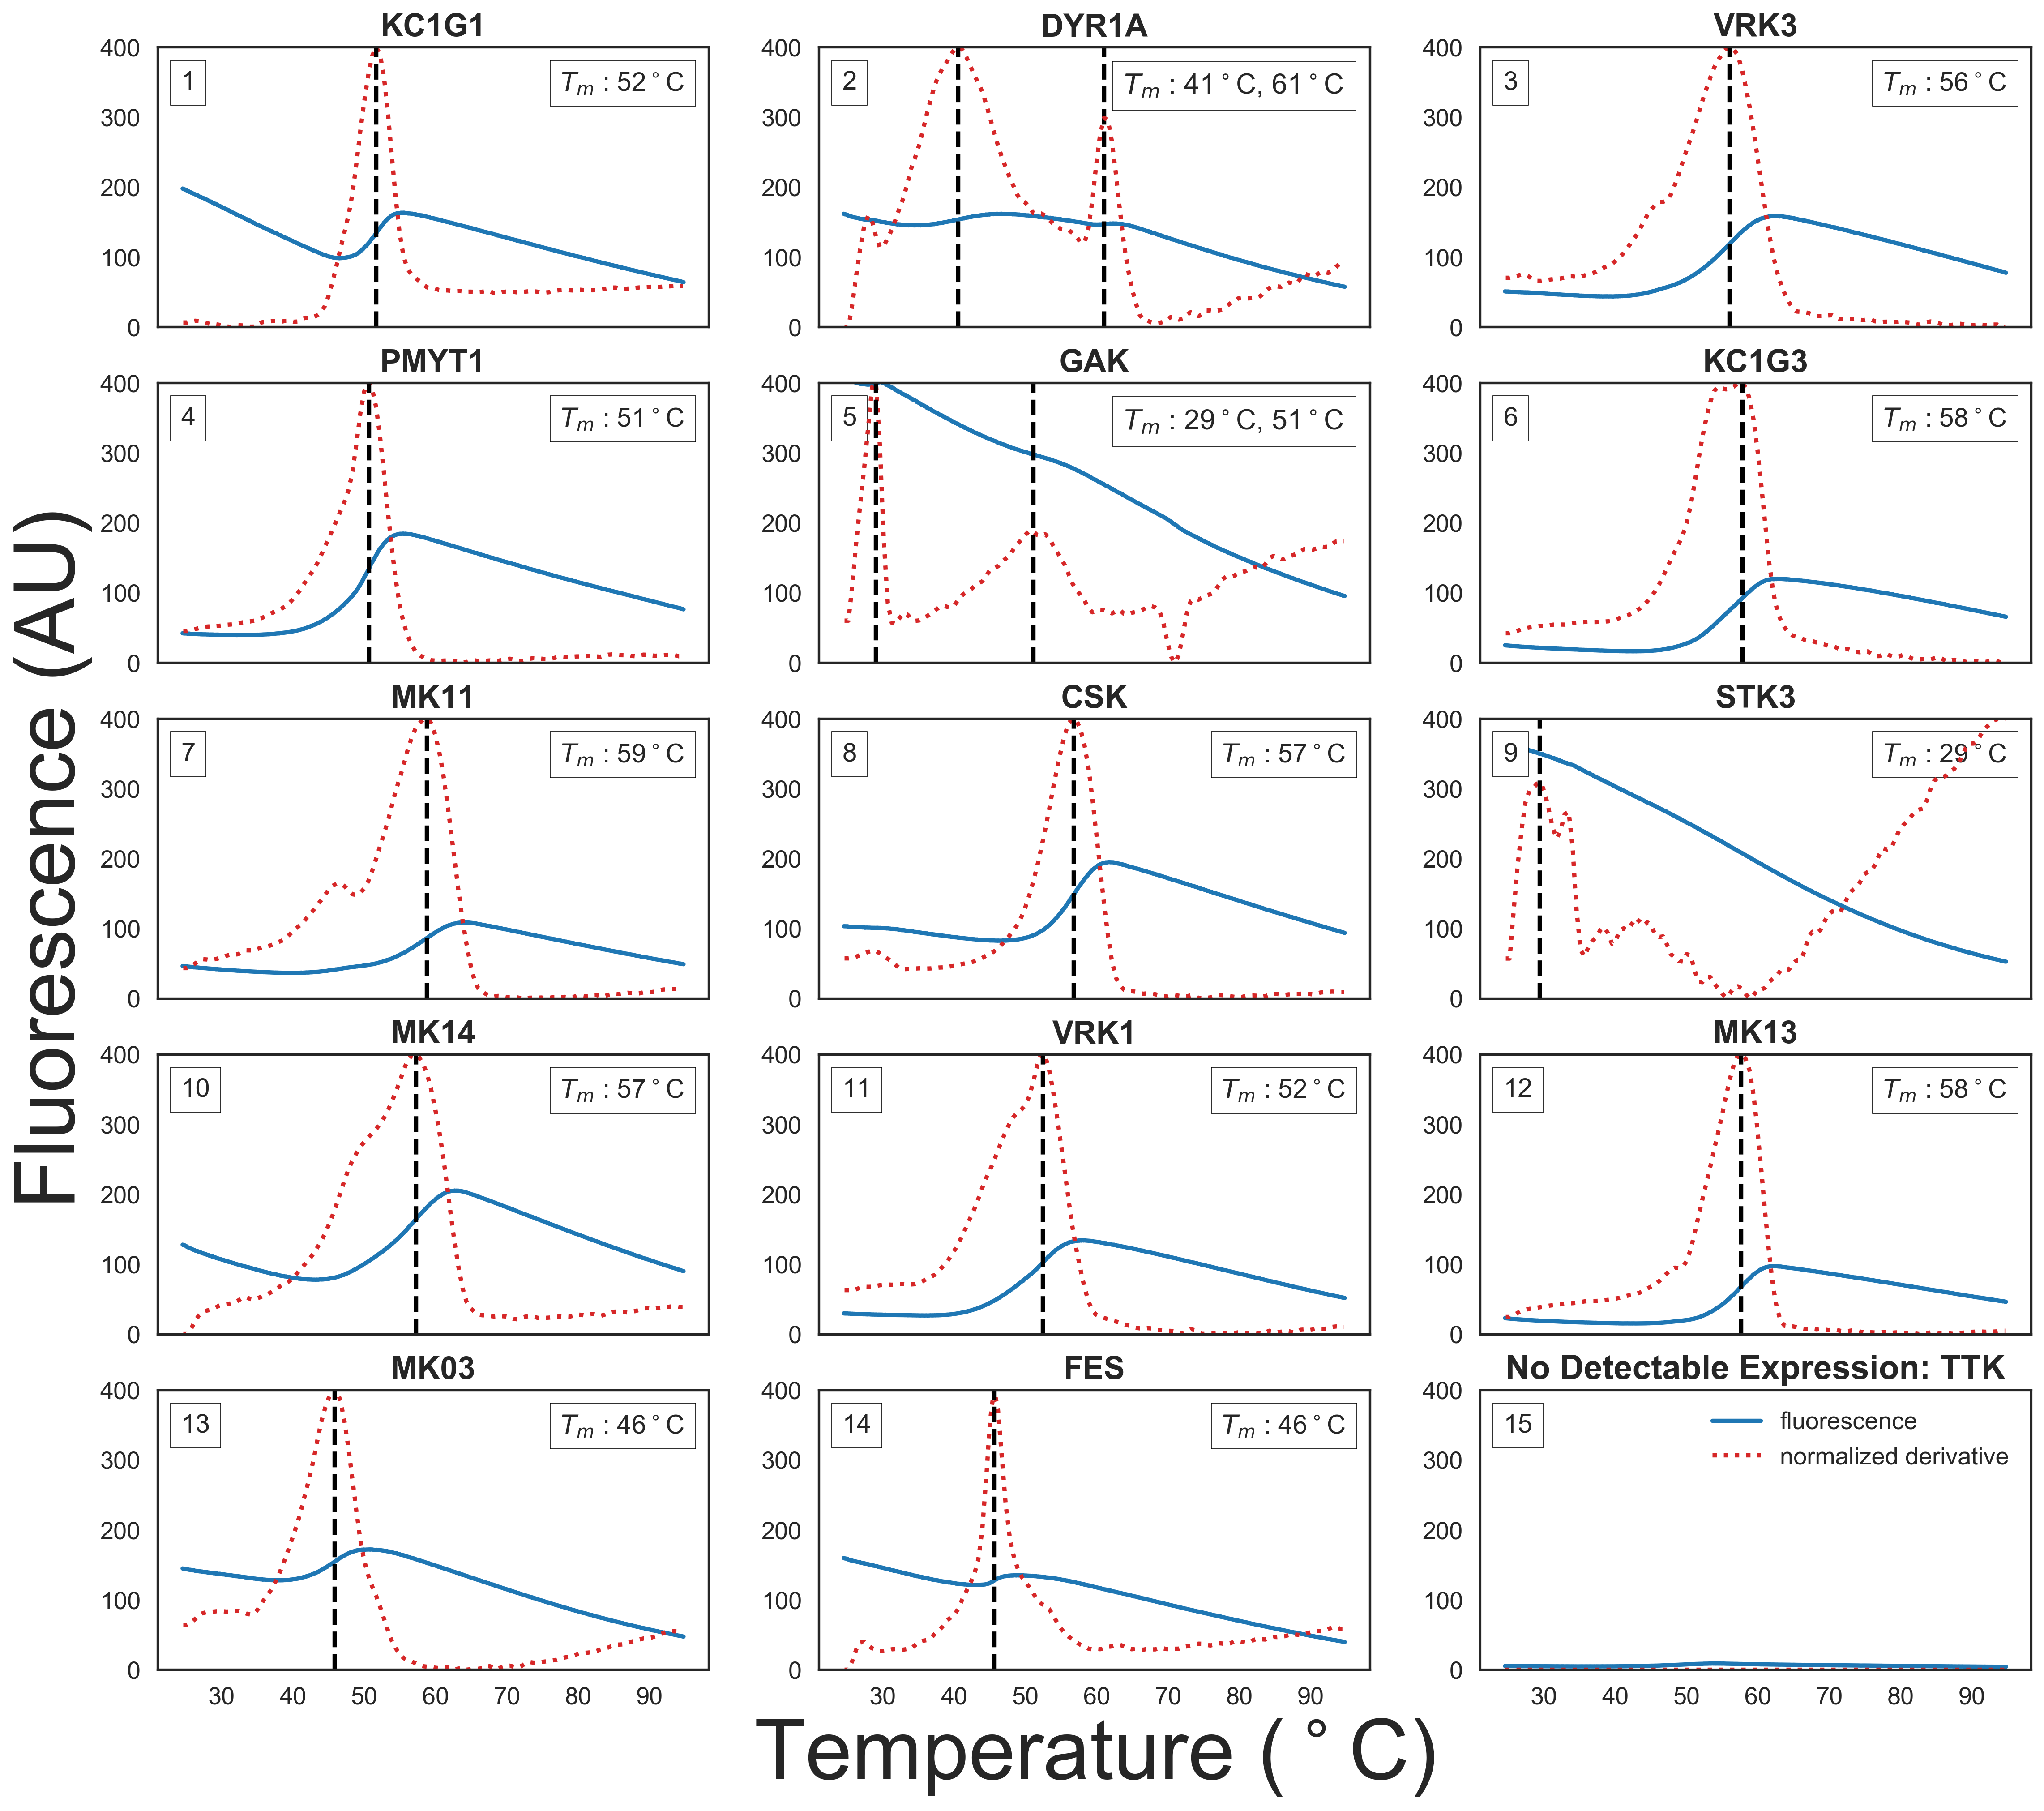

In [12]:
current_palette = sns.color_palette()

max_fluorescence = 400

fluorescence_color = current_palette[0]
deriv_color = current_palette[3]
tm_color = 'black'
    
fig = plt.figure(figsize=(18,16), dpi=300)
for i,col in enumerate(col_to_keep):
    well = list_of_wells[i]
    index = i + 1
    ax1 = fig.add_subplot(5,3,index)
    
    if i == 13: 
        plt.xlabel('Temperature ($^\circ$C)', fontsize=45)
    if i == 6: 
        plt.ylabel('Fluorescence (AU)', fontsize=45)
    
    ax2 = ax1.twinx()
    #plt.plot(temps, df_data[col], color='blue')

    # Plot fluorescence
    y = df_data4[col]
    #y = (y - y.min()) / (y.max() - y.min());
    ax1.plot(temps4, y, color=fluorescence_color)
    ax1.set_ylim(0, max_fluorescence)
    ax1.yaxis.set_ticks([0, 100, 200, 300, 400])
    
    # Title subplot
    plt.title('%s' % kinase_dict[well], fontsize=17, fontweight='bold')

    # Plot normalized derivative
    y = -df_data4_deriv[col]
    y = (y - y.min()) / (y.max() - y.min())
    ax2.plot(temps4_deriv, y, color=current_palette[3], linestyle=':')
    ax2.tick_params('n', colors='r')
    ax2.set_ylim(0, 1)
    ax2.yaxis.set_ticks([])    
    
    if i < 12:
        ax1.xaxis.set_ticks([])
        ax2.xaxis.set_ticks([])
    else:
        ax1.xaxis.set_ticks([30, 40, 50, 60, 70, 80, 90])
    
    # Plot Tms
    plt.axvline(x=list(df_tm4['Tm1'])[i], color=tm_color, linestyle='--')
    if str(list(df_tm4['Tm2'])[i]) != 'nan': 
        ax1.axvline(x=list(df_tm4['Tm2'])[i], color=tm_color, linestyle='--')
    
        
    # Plot Tms in legend
    if str(list(df_tm4['Tm2'])[i]) != 'nan': 
        anchored_text = AnchoredText("$T_m$ : %.0f$^\circ$C, %.0f$^\circ$C " % (list(df_tm4['Tm1'])[i], list(df_tm4['Tm2'])[i]) , loc=1, prop=dict(size=15))
    else: 
        anchored_text = AnchoredText("$T_m$ : %.0f$^\circ$C " % (list(df_tm4['Tm1'])[i]) , loc=1, prop=dict(size=14))
    #anchored_text = AnchoredText("$T_m^1$ : %.0f$^\circ$C" % (list(df_tm['Tm1'])[i]) , loc=1, prop=dict(size=15))
    
    anchored_text2 = AnchoredText('%s' % (index),  loc=2, prop=dict(size=14))
    ax1.add_artist(anchored_text)
    ax1.add_artist(anchored_text2)

# Plot no detectable expression case
ax1 = fig.add_subplot(5,3,15)
#ax.plot(temps_low, df_data_low[col_to_keeplow[0]], color='green')
index = index +1 
anchored_text2 = AnchoredText('%s' % (index),  loc=2, prop=dict(size=14))
ax1.add_artist(anchored_text2)
col = col_to_keeplow4[0]
y = df_data_low4[col]
#y = (y - y.min()) / (y.max() - y.min());
ax1.plot(temps4, y, color=fluorescence_color)
ax1.set_ylim(0, max_fluorescence)
# Make sure something is plotted for the derivative
y = y * 0
ax1.plot(temps4, y, color=deriv_color, linestyle=':')
ax1.xaxis.set_ticks([30, 40, 50, 60, 70, 80, 90])
plt.title('No Detectable Expression: TTK', fontsize=18, fontweight='bold')

plt.legend(['fluorescence', 'normalized derivative']);

# Save figure
#fig.tight_layout()
fig.savefig('bothplates_dualaxis_tm.pdf', bbox_inches='tight', dpi=300)